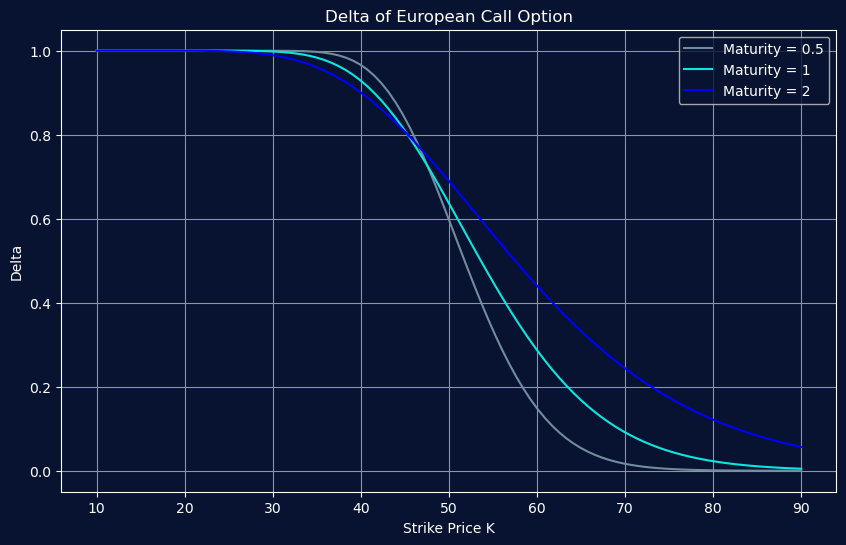

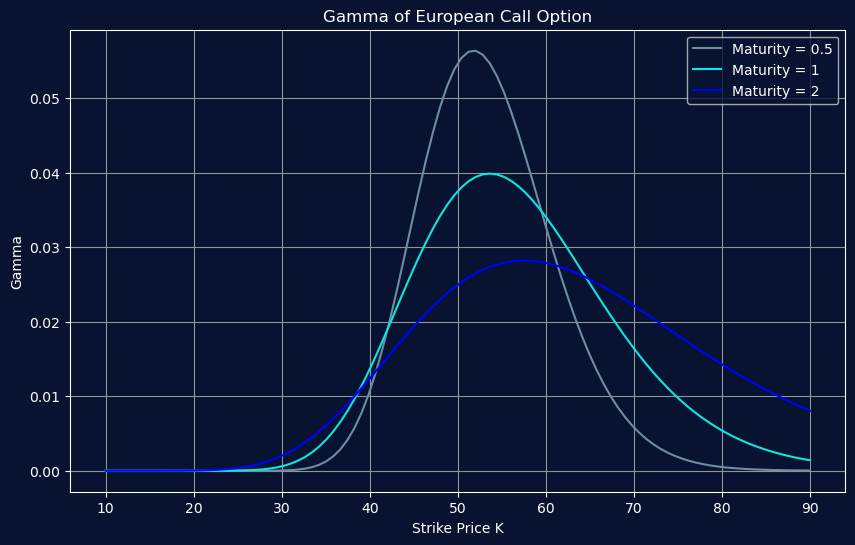

In [29]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define the Black-Scholes formula for a European call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Define the formula for calculating the delta of a call option
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Define the formula for calculating the gamma of a call option
def gamma_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

# Parameters
S = 50        # Underlying asset price
K_range = np.linspace(10, 90, 100)  # Range of strike prices
T = [0.5, 1, 2]  # Different maturities
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility

# Assuming delta_call and gamma_call functions are defined elsewhere
# Set matplotlib to use a dark style
fig_background_color = '#071330'  # Dark grey
plot_background_color = '#071330'  # Darker grey
text_color = 'white'

# Define your parameters and functions somewhere here

# Define a list of colors for the lines
colors = ['#718C9E', '#0CE6DF','#0000FF', 'blue', 'red']

# Plot delta of call option
plt.figure(figsize=(10, 6))
for idx, t in enumerate(T):
    deltas = [delta_call(S, K, t, r, sigma) for K in K_range]
    # Use modulo operator to cycle through colors list if there are more Ts than colors
    plt.plot(K_range, deltas, label=f'Maturity = {t}', color=colors[idx % len(colors)])

plt.title('Delta of European Call Option', color=text_color)
plt.xlabel('Strike Price K', color=text_color)
plt.ylabel('Delta', color=text_color)
plt.legend(facecolor=plot_background_color)
plt.grid(True, color='#8D9797')  # Lighter grid lines for visibility
plt.gca().set_facecolor(plot_background_color)
plt.gcf().set_facecolor(fig_background_color)
plt.show()

# Plot gamma of call option
plt.figure(figsize=(10, 6))
for idx, t in enumerate(T):
    gammas = [gamma_call(S, K, t, r, sigma) for K in K_range]
    # Use modulo operator to cycle through colors list if there are more Ts than colors
    plt.plot(K_range, gammas, label=f'Maturity = {t}', color=colors[idx % len(colors)])

plt.title('Gamma of European Call Option', color=text_color)
plt.xlabel('Strike Price K', color=text_color)
plt.ylabel('Gamma', color=text_color)
plt.legend(facecolor=plot_background_color)
plt.grid(True, color='#8D9797')
plt.gca().set_facecolor(plot_background_color)
plt.gcf().set_facecolor(fig_background_color)
plt.show()